In [0]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.5'

In [0]:
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras import layers
from keras import models
from keras import optimizers
from keras import regularizers


In [0]:


(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [0]:
print('Training data')
print('Shape of train_images:' ,train_images.shape)
print('Shape of train_labels:' ,train_labels.shape)
print('Shape of test_images:' ,test_images.shape)
print('Shape of test_labels:', test_labels.shape)


Training data
Shape of train_images: (50000, 32, 32, 3)
Shape of train_labels: (50000, 1)
Shape of test_images: (10000, 32, 32, 3)
Shape of test_labels: (10000, 1)


In [0]:

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [0]:

REG=0.0005
model = models.Sequential()
model.add(layers.Conv2D(512, (3, 3), activation='relu',kernel_regularizer=regularizers.l2(REG), input_shape=(32, 32, 3)))
model.add(layers.Conv2D(512, (3, 3),kernel_regularizer=regularizers.l2(REG), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(1024, (3, 3),kernel_regularizer=regularizers.l2(REG), activation='relu'))
model.add(layers.Conv2D(1024, (3, 3),kernel_regularizer=regularizers.l2(REG), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 512)       14336     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 512)       2359808   
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 512)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 1024)      4719616   
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 1024)      9438208   
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 1024)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 25600)            

In [0]:


model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [0]:
from keras.callbacks import Callback, ModelCheckpoint

checkpoint = ModelCheckpoint(
    '/content/cipher_decay0005.h5', 
    monitor='val_acc', 
    verbose=0, 
    save_best_only=True, 
    save_weights_only=False
)

In [10]:
history = model.fit(train_images, train_labels, epochs=25, batch_size=64, validation_split=0.2, callbacks=[checkpoint])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 40000 samples, validate on 10000 samples
Epoch 1/25





40000/40000 [==============================] - 66s 2ms/step - loss: 2.0478 - acc: 0.4134 - val_loss: 1.6573 - val_acc: 0.5167
Epoch 2/25
40000/40000 [==============================] - 57s 1ms/step - loss: 1.4253 - acc: 0.5913 - val_loss: 1.5044 - val_acc: 0.5610
Epoch 3/25
40000/40000 [==============================] - 57s 1ms/step - loss: 1.1645 - acc: 0.6693 - val_loss: 1.0462 - val_acc: 0.7076
Epoch 4/25
40000/40000 [==============================] - 57s 1ms/step - loss: 0.9918 - acc: 0.7248 - val_loss: 1.0263 - val_acc: 0.7096
Epoch 5/25
40000/40000 [==============================] - 57s 1ms/step - loss: 0.8670 - acc: 0.7639 - val_loss: 0.8845 - val_acc: 0.7558
Epoch 6/25
40000/40000 [==============================] - 58s 1ms/step - loss: 0.7695 - acc: 0.7949 - val_loss: 0.8486 - val_acc: 0.7694
Epoch 7/25
40000/40000 [==

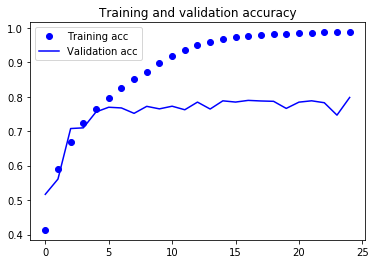

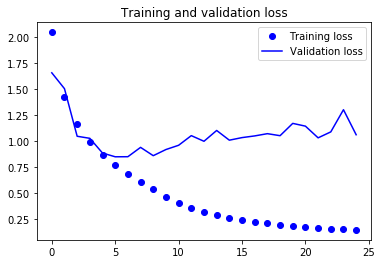

In [11]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
 model = keras.models.load_model('/content/cipher_decay0005.h5')


In [13]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 5s 537us/step


In [14]:
test_acc

0.7829

In [15]:
test_loss

1.1245526787281037

In [16]:
import numpy as np
yActualVal=np.argmax(test_labels,axis=1)
yActualVal

array([3, 8, 8, ..., 5, 1, 7])

In [17]:
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix

yPredictedVal = model.predict_classes(test_images)
yPredictedVal

array([3, 8, 8, ..., 5, 4, 7])

In [18]:
print(classification_report(y_true=yActualVal, y_pred=yPredictedVal))


              precision    recall  f1-score   support

           0       0.82      0.81      0.81      1000
           1       0.89      0.87      0.88      1000
           2       0.72      0.68      0.70      1000
           3       0.58      0.66      0.62      1000
           4       0.75      0.77      0.76      1000
           5       0.74      0.64      0.69      1000
           6       0.86      0.82      0.84      1000
           7       0.84      0.82      0.83      1000
           8       0.81      0.91      0.86      1000
           9       0.85      0.85      0.85      1000

    accuracy                           0.78     10000
   macro avg       0.79      0.78      0.78     10000
weighted avg       0.79      0.78      0.78     10000



In [19]:
print(confusion_matrix(y_true=yActualVal, y_pred=yPredictedVal))


[[805  14  29  22  19   5   7   9  71  19]
 [ 10 874   4   9   4   3   5   1  32  58]
 [ 51   6 676  68  71  44  35  24  20   5]
 [ 19   7  61 661  49 106  42  22  15  18]
 [ 12   1  59  69 769  12  22  37  12   7]
 [ 13   3  40 186  36 644  11  45  11  11]
 [  8   1  36  56  33  14 824   8  13   7]
 [ 10   2  23  43  44  33   3 822   8  12]
 [ 29  16   5  12   3   4   4   2 907  18]
 [ 21  63   4  14   4   3   7   5  32 847]]
